# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is "linear" because it predicts outcomes using a weighted sum of input features. "Linear" refers to the relationship between features and the outcome being a straight line or flat plane
2. If the model has an intercept:
      - The coefficient shows how much more/less the outcome is for that category compared to the reference category
  If the model does not have an intercept:
      - Coefficients directly show the average outcome for each category
3. No, Linear regression predicts numbers, like prices or scores, not categories, like yes/no.
4. Some signs include working perfectly on training data but poorly on new data, coefficients change a lot with small data changes, and high R^2 on training data but low R^2 on test data
5. In the two-stage least squares (2SLS) method, you first predict each variable using the others (stage 1), then apply these predictions to the original model (stage 2). Multicollinearity happens when others virtually correctly anticipate a variable in stage 1, resulting in near-zero residuals (prediction errors). This suggests there is insufficient independent variation to estimate the genuine influence, resulting in unstable or nonsensical coefficient values. For example, if two factors such as "years of education" and "job experience" are closely related, 2SLS struggles to distinguish their respective effects.
6. To capture curved or complex patterns in your data, use mathematic transformations to change your features. Squaring a variable (x^2) models U-shaped interactions, whereas taking its logarithm (log(x)) works for instances where effects expand or shrink multiplicatively, such as compound interest. Interaction terms (x1 x x2) allow you to investigate how two factors interact to influence an outcome. Tools like PolynomialFeatures in Python's sklearn package make this process easier by automatically creating these modified features, allowing you to train a standard linear regression model while still describing nonlinear patterns.
7. The intercept denotes the projected outcome when all features are zero. This value can be misleading if zero is not a realistic representation of your data. The slope coefficient indicates the average change in result for each one-unit increase in a feature. For example, a coefficient of 10 for "rainfall" indicates that each additional inch of rain results in a 10-unit increase in agricultural productivity. For dummy variables, the coefficient represents the difference between a given category and the reference group. If a "urban" coefficient is 20, urban areas have 20 units better results than rural regions (the excluded category).

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

Average Prices and Scores by Neighbourhood:
                    Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750

The most expensive borough on average is: Manhattan


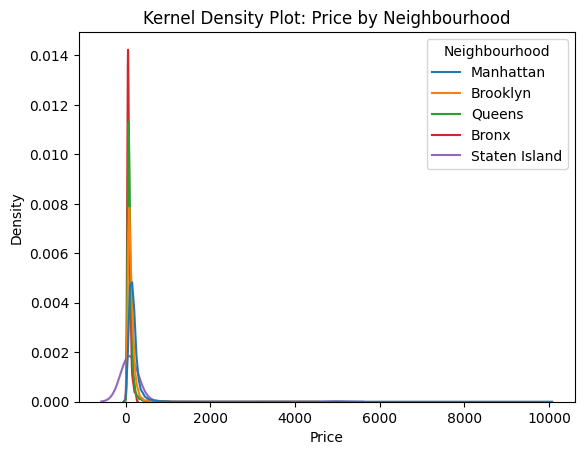

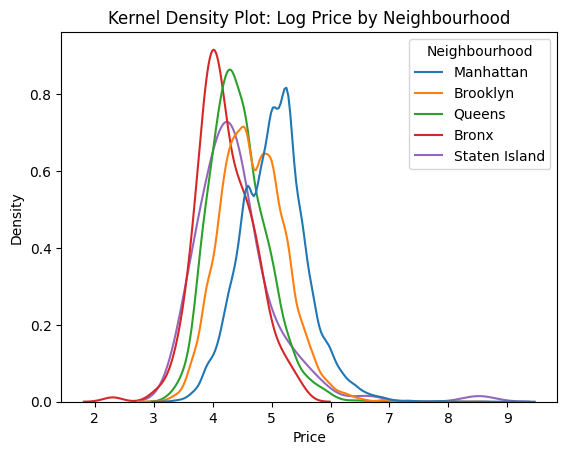


Coefficients (No Intercept):
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64

Coefficients (With Intercept):
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64
Intercept: 75.27649769585331

Regression Results (Part 4):
R^2: 0.045925883817350965, RMSE: 140.91821103729345
Coefficient on Review Scores Rating: 1.2118517840632352
Most expensive neighbourhood: Brooklyn

Regression Results (Part 5):
R^2: 0.054242713551245325, RMSE: 140.30266238276283
Coefficient on Review Scores Rating: 1.2010106602298556
Most expensive property type and neighbourhood combination: Brooklyn


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load the dataset
data = pd.read_csv('Q1_clean.csv')

# rename columns for easier access
data.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# 1. compute average prices and scores by neighbourhood
avg_prices_scores = data.groupby('Neighbourhood').agg({'Price': 'mean', 'Review Scores Rating': 'mean'})
most_expensive_borough = avg_prices_scores['Price'].idxmax()
print("Average Prices and Scores by Neighbourhood:")
print(avg_prices_scores)
print(f"\nThe most expensive borough on average is: {most_expensive_borough}")

# Kernel density
sns.kdeplot(data=data, x='Price', hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot: Price by Neighbourhood')
plt.show()

sns.kdeplot(data=data, x=np.log(data['Price']), hue='Neighbourhood', common_norm=False)
plt.title('Kernel Density Plot: Log Price by Neighbourhood')
plt.show()

# 2. regression of price on Neighbourhood (without intercept)
dummies = pd.get_dummies(data['Neighbourhood'], drop_first=False)
X_no_intercept = dummies
y = data['Price']
model_no_intercept = LinearRegression(fit_intercept=False).fit(X_no_intercept, y)
coefficients_no_intercept = pd.Series(model_no_intercept.coef_, index=X_no_intercept.columns)
print("\nCoefficients (No Intercept):")
print(coefficients_no_intercept)

# 3. Regression of price on Neighbourhood (with intercept)
X_with_intercept = pd.get_dummies(data['Neighbourhood'], drop_first=True)
model_with_intercept = LinearRegression(fit_intercept=True).fit(X_with_intercept, y)
coefficients_with_intercept = pd.Series(model_with_intercept.coef_, index=X_with_intercept.columns)
intercept = model_with_intercept.intercept_
print("\nCoefficients (With Intercept):")
print(coefficients_with_intercept)
print(f"Intercept: {intercept}")

# 4. Regression of Price on Review Scores Rating and Neighbourhood (80/20 split)
X_full_1 = pd.concat([data[['Review Scores Rating']], pd.get_dummies(data['Neighbourhood'], drop_first=True)], axis=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_full_1, y, test_size=0.2, random_state=42)
model_full_1 = LinearRegression().fit(X_train_1, y_train_1)

y_pred_1 = model_full_1.predict(X_test_1)
r2_1 = r2_score(y_test_1, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1))
review_score_coeff_1 = model_full_1.coef_[0]
most_expensive_property_type_1 = X_full_1.columns[np.argmax(model_full_1.coef_[1:])]
print("\nRegression Results (Part 4):")
print(f"R^2: {r2_1}, RMSE: {rmse_1}")
print(f"Coefficient on Review Scores Rating: {review_score_coeff_1}")
print(f"Most expensive neighbourhood: {most_expensive_property_type_1}")

# 5. Regression of Price on Review Scores Rating, Neighbourhood, and Property Types (80/20 split)
X_full_2 = pd.concat([data[['Review Scores Rating']],
                      pd.get_dummies(data['Neighbourhood'], drop_first=True),
                      pd.get_dummies(data['Property Type'], drop_first=True)], axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_full_2, y, test_size=0.2, random_state=42)
model_full_2 = LinearRegression().fit(X_train_2, y_train_2)

y_pred_2 = model_full_2.predict(X_test_2)
r2_2 = r2_score(y_test_2, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
review_score_coeff_2 = model_full_2.coef_[0]
most_expensive_property_type_neighbourhood_combination = X_full_2.columns[np.argmax(model_full_2.coef_[1:])]
print("\nRegression Results (Part 5):")
print(f"R^2: {r2_2}, RMSE: {rmse_2}")
print(f"Coefficient on Review Scores Rating: {review_score_coeff_2}")
print(f"Most expensive property type and neighbourhood combination: {most_expensive_property_type_neighbourhood_combination}")

6. Because the model is now taking into account more elements, the coefficient on the Review Scores Rating varies between parts 4 and 5. We are gaining a better understanding of the factors that actually influence the pricing by include Property Type in the research. The coefficient's decline indicates that some of the price discrepancies we assumed were caused by ratings may really be the result of various property kinds. This indicates that the first model (part 4) most likely overstated the degree to which ratings influence price. When we now take neighborhood and property type into account, the new coefficient helps us better understand the relationship between ratings and price. It demonstrates how we may isolate the influence of several factors on price with the aid of multiple linear regression.

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Price Summary:
count    976.000000
mean      14.104181
std        0.450276
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       15.587407
Name: Price_ihs, dtype: float64


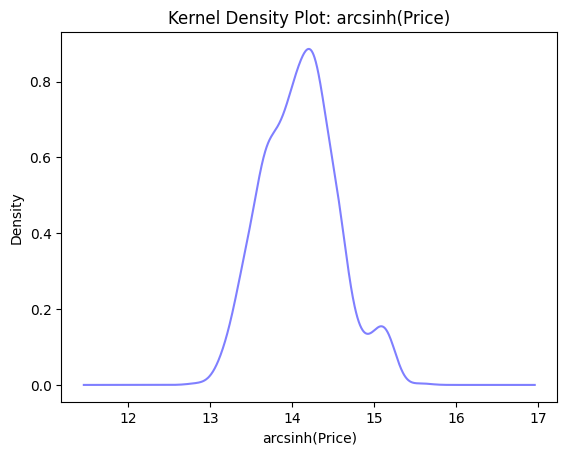

Price Summary by Brand:
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki  293.0  13.911280  0.371409  13.068963  13.619496  13.868103   
Nissan           4.0  14.334341  0.39261

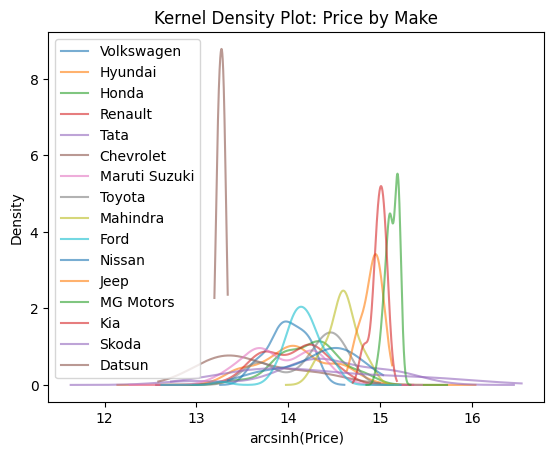

Most Expensive Brands:
Make
MG Motors        1.869457e+06
Kia              1.614750e+06
Jeep             1.499500e+06
Skoda            1.136000e+06
Mahindra         1.100167e+06
Tata             1.055217e+06
Nissan           8.842500e+05
Toyota           8.003400e+05
Honda            7.989726e+05
Ford             7.211731e+05
Hyundai          6.918918e+05
Renault          6.625735e+05
Volkswagen       6.058276e+05
Maruti Suzuki    5.887850e+05
Chevrolet        4.535000e+05
Datsun           2.896667e+05
Name: Price, dtype: float64
Training Set Shape: (780, 14)
Testing Set Shape: (196, 14)
Numeric Model:
Train R²: 0.4170, Train RMSE: 0.3459
Test R²: 0.3789, Test RMSE: 0.3442

Categorical Model:
Train R²: 0.6392, Train RMSE: 0.2721
Test R²: 0.6199, Test RMSE: 0.2692

Categorical Variables perform better on the test set.

Combined Model:
Train R²: 0.8222, Train RMSE: 0.1910
Test R²: 0.7996, Test RMSE: 0.1955

The combined model performs better than both individual models.

Figures for Degr

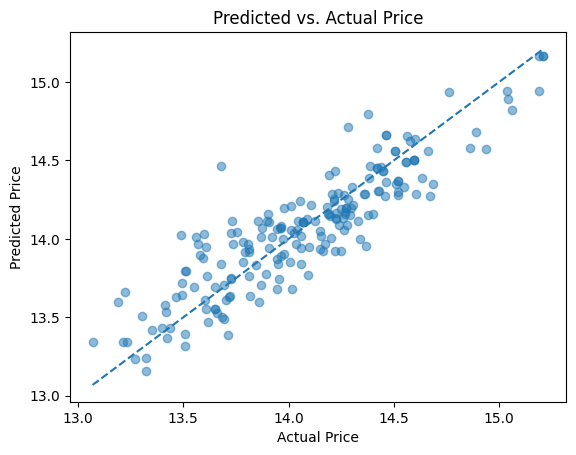

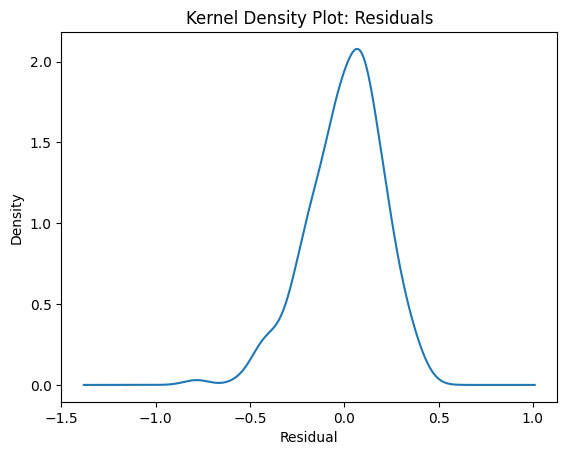

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# load and clean the data
data = pd.read_csv('cars_hw.csv')
data.drop_duplicates(inplace=True)
data['No_of_Owners'] = data['No_of_Owners'].str.replace(r'st|nd|rd|th', '', regex=True).astype(int)
data['Price_ihs'] = np.arcsinh(data['Price'])
data['Mileage_Run_ihs'] = np.arcsinh(data['Mileage_Run'])

# 2. summarize
price_summary = data['Price_ihs'].describe()
print("Price Summary:")
print(price_summary)

plt.figure()
data['Price_ihs'].plot(kind='density', color='blue', alpha=0.5)
plt.title('Kernel Density Plot: arcsinh(Price)')
plt.xlabel('arcsinh(Price)')
plt.ylabel('Density')
plt.show()

# group kernel
brand_price_summary = data.groupby('Make')['Price_ihs'].describe()
print("Price Summary by Brand:")
print(brand_price_summary)

plt.figure()
for make in data['Make'].unique():
    subset = data[data['Make'] == make]
    subset['Price_ihs'].plot(kind='density', label=make, alpha=0.6)
plt.title('Kernel Density Plot: Price by Make')
plt.xlabel('arcsinh(Price)')
plt.ylabel('Density')
plt.legend()
plt.show()

mean_price = data.groupby('Make')['Price'].mean().sort_values(ascending=False)
print("Most Expensive Brands:")
print(mean_price)


# 3. split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Testing Set Shape:", test_data.shape)

# 4. regression model
numeric_vars = ["Make_Year", "Mileage_Run", "Seating_Capacity"]
categorical_vars = ["Color", "Body_Type", "Make", "Fuel_Type", "Transmission_Type"]

# Numeric model
X_train_num = train_data[numeric_vars]
y_train = train_data["Price_ihs"]

X_test_num = test_data[numeric_vars]
y_test = test_data["Price_ihs"]

model_num = LinearRegression().fit(X_train_num, y_train)

y_train_pred_num = model_num.predict(X_train_num)
y_test_pred_num = model_num.predict(X_test_num)

r2_train_num = r2_score(y_train, y_train_pred_num)
rmse_train_num = mean_squared_error(y_train, y_train_pred_num) ** 0.5  # Compute RMSE manually

r2_test_num = r2_score(y_test, y_test_pred_num)
rmse_test_num = mean_squared_error(y_test, y_test_pred_num) ** 0.5  # Compute RMSE manually

print("Numeric Model:")
print(f"Train R²: {r2_train_num:.4f}, Train RMSE: {rmse_train_num:.4f}")
print(f"Test R²: {r2_test_num:.4f}, Test RMSE: {rmse_test_num:.4f}")
print()

# Categorical model
X_train_cat = pd.get_dummies(train_data[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(test_data[categorical_vars], drop_first=True)

# Align columns in test set to match training set
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

model_cat = LinearRegression().fit(X_train_cat, y_train)

y_train_pred_cat = model_cat.predict(X_train_cat)
y_test_pred_cat = model_cat.predict(X_test_cat)

r2_train_cat = r2_score(y_train, y_train_pred_cat)
rmse_train_cat = mean_squared_error(y_train, y_train_pred_cat) ** 0.5  # Compute RMSE manually

r2_test_cat = r2_score(y_test, y_test_pred_cat)
rmse_test_cat = mean_squared_error(y_test, y_test_pred_cat) ** 0.5  # Compute RMSE manually

print("Categorical Model:")
print(f"Train R²: {r2_train_cat:.4f}, Train RMSE: {rmse_train_cat:.4f}")
print(f"Test R²: {r2_test_cat:.4f}, Test RMSE: {rmse_test_cat:.4f}")
print("\nCategorical Variables perform better on the test set.\n")

# Combined model
X_train_all = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_num, X_test_cat], axis=1)

model_all = LinearRegression().fit(X_train_all, y_train)

y_train_pred_all = model_all.predict(X_train_all)
y_test_pred_all = model_all.predict(X_test_all)

r2_train_all = r2_score(y_train, y_train_pred_all)
rmse_train_all = mean_squared_error(y_train, y_train_pred_all) ** 0.5  # Compute RMSE manually

r2_test_all = r2_score(y_test, y_test_pred_all)
rmse_test_all = mean_squared_error(y_test, y_test_pred_all) ** 0.5  # Compute RMSE manually

print("Combined Model:")
print(f"Train R²: {r2_train_all:.4f}, Train RMSE: {rmse_train_all:.4f}")
print(f"Test R²: {r2_test_all:.4f}, Test RMSE: {rmse_test_all:.4f}")
print("\nThe combined model performs better than both individual models.\n")

# 5. Polynomial Expansion
best_r2_poly = -float('inf')
best_rmse_poly = float('inf')
best_degree_poly = None

# Loop through polynomial degrees from 1 to 50
for degree in range(1, 50):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)

    # Train the polynomial regression model
    model_poly = LinearRegression().fit(X_train_poly, y_train)

    # Make predictions for training and testing sets
    y_train_pred_poly = model_poly.predict(X_train_poly)
    y_test_pred_poly = model_poly.predict(X_test_poly)

    # Calculate R² and RMSE for both training and testing sets
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

    # Print metrics for the current degree
    print(f"Figures for Degree {degree}:")
    print(f"Train R²: {r2_train_poly:.4f}, Train RMSE: {rmse_train_poly:.4f}")
    print(f"Test R²: {r2_test_poly:.4f}, Test RMSE: {rmse_test_poly:.4f}")
    print()

    # Stop when R² goes negative on the test set
    if r2_test_poly < 0:
        print(f"R² went negative at Degree {degree}.")
        break

    # Update the best polynomial model if this degree performs better
    if r2_test_poly > best_r2_poly:
        best_r2_poly = r2_test_poly
        best_rmse_poly = rmse_test_poly
        best_degree_poly = degree

# Print the best polynomial model's metrics
print(f"Best Degree for Polynomial Features: {best_degree_poly}")
print(f"Test R² for Best Polynomial Model: {best_r2_poly:.4f}")
print(f"Test RMSE for Best Polynomial Model: {best_rmse_poly:.4f}")

# 6.
# Combined model
plt.figure()
plt.scatter(y_test, y_test_pred_all, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. Actual Price")
plt.show()

# The values line up very well along the diagonal

residuals = y_test - y_test_pred_all

plt.figure()
pd.Series(residuals).plot(kind="density")
plt.title("Kernel Density Plot: Residuals")
plt.xlabel("Residual")
plt.show()

# The residuals are bell-shaped around 0.

# Strengths:
# - The model fits well, as generally y = x seems to be the observed trend.
# - The bell curve is centered basically at 0, indicating that residuals are roughly normally distributed.
# - The incorporation of both categorical and numerical variables can help to explain a greater breadth of variance in price.

# Weaknesses:
# - The standard deviation based on the residual plot is fairly large, although it indicates a normal distribution.
# - The model does not incorporate any non-linear terms.
# - Although changing the degree didn't improve the model, there may have been some logarithmic or smaller than 1 degree which might produce a better model.


**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
